## **Jupyter Notebook for exporting data into a HDF5 file.**
- version: 2.0 <br>
- author: William Rigaut <br>
- date: 06.01.2025  <br>

In [1]:
sample_metadata = {
    "sample_name": "2711_LaCeNdFeB",
    "composition": "LaCeNdFeB",
    
    "type": "Triode",
    "substrate": "SiO2",
    "deposition_temperature": "300K",
    "layer_1": {"element": "Ta", "thickness": "100nm"},
    "layer_2": {"element": "NdLaCeFeB", "thickness": "1500nm"},
    "layer_3": {"element": "Ta", "thickness": "10nm"},
    "annealing_temperature": "873K",
    "annealing_time": "600s"
}

In [2]:
import packages.compilers.compile_hdf5 as compile_hdf5
import packages.compilers.compile_edx as compile_edx
import packages.compilers.compile_xrd as compile_xrd
import packages.compilers.compile_moke as compile_moke
import pathlib
import os
import h5py
from tqdm import tqdm


datapath = pathlib.Path("./data/")
#os.mkdir(datapath)

HDF5_path = datapath / "2711_LaCeNdFeB.hdf5"
compile_hdf5.create_new_hdf5(HDF5_path, sample_metadata)

filepath_edx = pathlib.Path("../Jupyter_App/data/EDX/2711_LaCeNdFeB")
for file in tqdm([f for f in os.listdir(filepath_edx) if f.endswith('.spx')]):
    fullpath = filepath_edx / file
    compile_edx.write_edx_to_hdf5(HDF5_path, fullpath)


filepath_xrd = pathlib.Path("../Jupyter_App/data/XRD/NdLaCeFeB 2711 600 10min/")
for file in tqdm([f for f in os.listdir(filepath_xrd) if f.startswith("Areamap") and f.endswith('.ras')]):
    fullpath = filepath_xrd / file
    compile_xrd.write_xrd_to_hdf5(HDF5_path, fullpath)

filepath_moke = pathlib.Path("../../High-throughput-interactive-app/data/MOKE/NdLaCeFeB-triple-target/2711 NdLaCeFeB TdepRT 600 10min")
for file in tqdm([f for f in os.listdir(filepath_moke) if f.endswith('_magnetization.txt')]):
    fullpath = filepath_moke / file
    compile_moke.write_moke_to_hdf5(HDF5_path, fullpath)



100%|██████████| 293/293 [00:09<00:00, 30.41it/s]


In [1]:
import packages.readers.read_hdf5 as read_hdf5
import pathlib

datapath = pathlib.Path("./data/2711_LaCeNdFeB/")
HDF5_path = datapath / "2711_LaCeNdFeB.hdf5"

data = read_hdf5.get_full_dataset(HDF5_path)
print(data)
print(data.attrs)

<xarray.Dataset> Size: 19kB
Dimensions:                       (y: 17, x: 17)
Coordinates:
  * y                             (y) int64 136B -40 -35 -30 -25 ... 25 30 35 40
  * x                             (x) int64 136B -40 -35 -30 -25 ... 25 30 35 40
Data variables:
    Ce Composition                (y, x) float64 2kB nan nan nan ... nan nan nan
    Fe Composition                (y, x) float64 2kB nan nan nan ... nan nan nan
    La Composition                (y, x) float64 2kB nan nan nan ... nan nan nan
    Nd Composition                (y, x) float64 2kB nan nan nan ... nan nan nan
    Coercivity                    (y, x) float64 2kB nan nan nan ... nan nan nan
    CubicRE Lattice Parameter A   (y, x) float64 2kB nan nan nan ... nan nan nan
    Nd2Fe14B Lattice Parameter A  (y, x) float64 2kB nan nan nan ... nan nan nan
    Nd2Fe14B Lattice Parameter C  (y, x) float64 2kB nan nan nan ... nan nan nan
{}


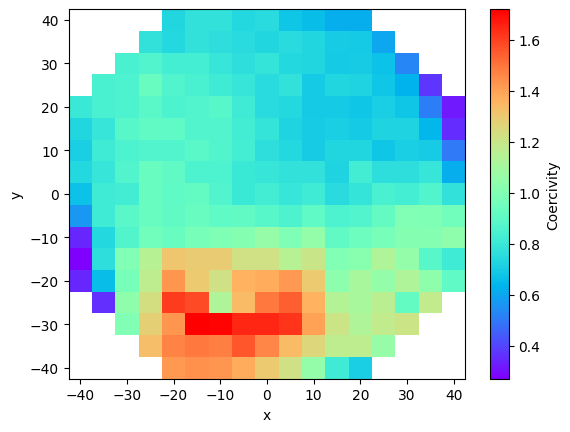

In [2]:
coercivity_plot = data["Coercivity"].plot.pcolormesh(cmap='rainbow')

**@end-of-notebook**